# Aprendizaje Formal

## Práctica 3: Regresión lineal con múltiples variable

### Índice de la práctica

- [Regresión lineal con varias variables](#Regresión-lineal-con-varias-variables)
- [Solución directa](#Solución-directa)
- [Descenso por gradiente](#Descenso-por-gradiente)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from test_helper import Test

%matplotlib inline  

### Regresión lineal con varias variables

En esta práctica vamos a tratar un problema de regresión lineal de varias variables de entrada. En este caso van a ser 2 pero podría usarse para cualquier número de variables de entrada.

Para ello, en primer lugar se debe leer los datos almacenados en el fichero ex1data2.txt mediante la función loadtxt de NumPy. Los datos contenidos en este fichero corresponden a un problema en el que se debe predecir el valor de una casa en base a su número de pies cuadrados y su número de habitaciones. En este fichero está almacenado el histórico de las casas valoradas en la actualidad. La primera columna corresponde al pies de metros cuadrados, la segunda al número de habitaciones y la tercera a la valoración realizada.


In [2]:
# Usa la función loadtxt de numpy para cargar los datos en la variable data
data = np.loadtxt('ex1data2.txt', delimiter=',')

**Nota: La instrucción Test.assertEquals coprueba si el resultado que habéis obtenido es correcto. En caso de que no sea correcto os devuelve un mensaje de error.**

In [3]:
Test.assertEquals(list(data[0,:]), [2104.0, 3.0, 399900], 'data no está bien formada')

1 test passed.


Vamos a mostrar una gráfica de puntos para visualizar la distribución de las instancias del problema. De esta forma podemos comprobar si es posible que el modelo de regresión lineal se ajuste bien a los datos o no. Dado que tenemos dos variables de entrada y una de salida todavía somos capaces de dibujar los datos si usamos un scatter plot en 3D.

Text(0.5,0,'Precio en $')

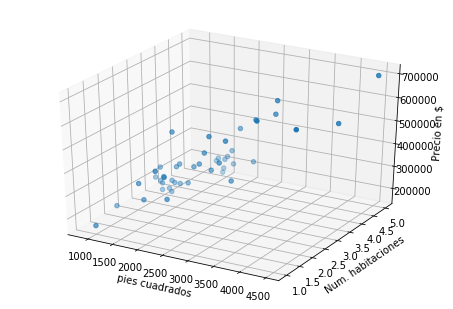

In [4]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data[:, 0], data[:, 1], data[:, 2])

ax.set_xlabel('pies cuadrados')
ax.set_ylabel('Num. habitaciones')
ax.set_zlabel('Precio en $')

A continuación debéis crear los datos de entrada ($X$) y de salida ($y$) para poder realizar el aprendizaje de los parámetros de la regresión lineal ($\theta$). Recordar que la primera columna de los datos de entrada debe estar compuesta por unos para multiplicar al término independiente de la regresión lineal. Por tanto, la variable $X$ estará compuesta por dos columnas: una de unos y otra con los datos correspondientes al número de habitantes de las ciudades. La variable $y$ estará compuesta por los beneficios de los camiones de comida en las diferentes ciudades.

In [5]:
ones = np.ones(len(data))
X = np.vstack((ones, data[:, 0], data[:, 1])).T
y = data[:, 2].reshape(-1, 1)

In [6]:
Test.assertEquals(list(X[0,:]), [1.0, 2104.0, 3.0], 'X no está bien formada')
Test.assertEquals(list(y[:5, 0]), [399900.0, 329900.0, 369000.0, 232000.0, 539900.0], 'y no está bien formada')

1 test passed.
1 test passed.


#### Solución directa

Como primera aproximación para la regresión vamos a implementar la solución análitica o directa. Recordemos que tenemos que estimar los parámetros $\theta$. Para ello, y como ya tenemos los datos en la matriz $X$ con la primera columna siendo todo unos, simplemente obtenemos los valores de los parámetros aplicando la siguiente ecuación.

$$\theta = (X^T X)^{-1}X^Ty$$

Ten cuidado ya que $X$ es una matriz e $y$ es un vector (matriz de $n \times 1$). Por tanto, los productos que aparecen son entre matrices. Recuerda que en numpy el producto entre matrices se realiza mediante `np.dot()`.

A continuación programa la función `regDirecta` que reciba la matriz con los datos $X$ (asumiendo que su primera columna tendrá unos) y devuelva los valores de los parámetros $\theta$ mediante la solución directa. 

**¿Debes cambiar algo de la solución directa para 1 variable? **

**Nota:** En Python puedes usar la función `np.linalg.pinv` para obtener la inversa de una matriz.

In [7]:
def regDirecta(X, y):
    return np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)

Utiliza ahora la función que acabas de implementar para obtener los valores de $\theta$ para los datos disponibles.

In [8]:
# Obten los valores de theta
theta = regDirecta(X, y)
print(list(theta.ravel()))

[89597.90954279699, 139.21067401762542, -8738.019112327687]


In [9]:
Test.assertEquals(list(np.round(theta, 4)), [89597.9095, 139.2107, -8738.0191], 'Valor de theta incorrecto')

1 test passed.


#### Descenso por gradiente

Recordemos que no siempre obtenemos una matriz invertible y en esos casos solo podemos usar el descenso por gradiente. En el caso de la regresión lineal multivariable, las diferentes variables pueden estar en diferentes rangos lo que dificulta el aprendizaje del modelo. Por ello, es necesario primero realizar la normalización de los atributos.

#### Normalización / Estandarización

Para estandarizar los datos tenéis que definir una función llamada estandarizar que para cada variable debéis hacer el siguiente proceso:
* Calcular la media de los valores de la variable para todas las instancias (obtenemos un valor para cada variable)
* Calcular la desviación estándar de los valores de la variable para todas las instancias (obtenemos un valor para cada variable)
* A cada valor se le debe restar la media y el resultado dividirlo por la desviación estándar
* Devolver los datos estandarizados así como la media y la desviación estándar calculadas

In [10]:
def estandarizar(data):
    media = np.array([np.mean(data[:, i]) for i in np.arange(data.shape[1])])
    desv = np.array([np.std(data[:, i]) for i in np.arange(data.shape[1])])
    data = data - media
    data = data / desv
    return data, media, desv

Para estandarizar nuevos datos de test se debe realizar el mismo proceso que en el caso anterior pero, como son datos nuevos (datos de test), tenemos que utilizar la media y la desviación estándar obtenidas con los datos de entrenamiento. De esta forma la estandarización se realizará para todos los datos en las mismas condiciones. 

Definir una función que estandarice los nuevos datos de test. Para ello se aplica la misma ecuación que para la función anterior pero utilizando la media y la desviación estándar pasadas como parámetros de entrada (serán las obtenidas con el conjunto de entrenamiento). La función devuelve los nuevos datos estandarizados.

In [11]:
def estandarizarTest(datos, media, desv):
    datos = datos - media
    datos = datos / desv
    return datos

Ahora debéis utilizar la función estandarizar para realizar la estandarización de los datos de entrada almacenados en la variable data y almacenar los datos estandarizados en una variable llamada `entrada` así como la media y la desviación estándar calculadas con estos datos de entrenamiento.

Ten cuidado, recuerda que no puedes usar el $X$ que hemos preparado para la solución directa ya que la columna de unos no debe normalizarse. Tampoco debes normalizar la última columna de data, ya que corresponden a la salida. Una vez normalizado los valores de entrada, crea la matriz $X$ que debe estar compuesta por la matriz `entrada` con una primera columna de unos.

In [12]:
# Obtener entrada, media y desv
entrada, media, desv = estandarizar(data[:, :2])
# Crea la matriz X concatenando una columna de unos con la matriz entrada (hstack)
X = np.vstack((ones, entrada[:, 0], entrada[:, 1])).T
X[0, 2] += 0.00000000000000002 #tiene una pequeña diferencia con el assert en el redondeo o algo,asi nos da test passed
print(X[:5])

[[ 1.          0.13141542 -0.22609337]
 [ 1.         -0.5096407  -0.22609337]
 [ 1.          0.5079087  -0.22609337]
 [ 1.         -0.74367706 -1.5543919 ]
 [ 1.          1.27107075  1.10220517]]


In [13]:
Test.assertEquals(list(X[0,:]), [1.0, 0.13141542202104753, -0.22609336757768828], 'Normalización incorrecta')

1 test passed.


#### Implementación descenso por gradiente

A continuación debéis pensar si es necesario cambiar la función de coste programada en el primer ejercicio.

Recordar que la función de coste es: 

$$J(\theta) = \frac{1}{2m}\sum_{i=1}^m \left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right)^2$$


In [14]:
def computeCost(X, y, theta):
    m = y.size
        
    # Obtener h (la salida para cada ejemplo) y J a partir de la salida (error)
    h = X.dot(theta)
    s = np.sum(np.square(h[:, 0] - y[: , 0]))
    
    J = (1 / (2 * m)) * s
    
    return(J)

Vamos a comprobar si la función de coste está bien hecha. 

Recordar que debéis **crear los valores iniciales de los parámetros de la regresión lineal como un array columna de ceros** (lista de listas de un elemento). Luego, debéis llamar a la función `computeCost` con los datos de entrada ($X$), de salida ($y$) y los parámetros del modelo ($\theta$). Almacenar el resultado en la variable resultado.

Imprimir en pantalla el resultado y comprobar si es correcto.

In [15]:
# Crear los theta como una columna de ceros y calcula el coste asociado en la variable coste
theta = np.zeros((3, 1))
coste = computeCost(X, y, theta)
print(coste)

65591548106.45744


In [16]:
Test.assertEquals(round(coste, 1), 65591548106.5, 'Resultado incorrecto')

1 test passed.


Ahora debéis pensar si es necesario modificar la función que realiza el descenso por gradiente para realizar el aprendizaje de los parámetros de la regresión lineal en base a los datos (ver práctica 2).

In [17]:
def gradientDescent(X, y, theta, alpha=0.01, num_iters=1500):
    m = y.size
    J_history = np.zeros(num_iters)
    
    for iter in np.arange(num_iters):
        # Obtener la salida para los ejemplos en la iteración actual (h), calcular los nuevos valores de theta y guardar
        # el coste de la iteración en J_history[iter]
        h = X.dot(theta)
        
        difference = h - y
        theta = theta - alpha * (1 / m) * X.T.dot(difference)
        
        J_history[iter] = computeCost(X, y, theta)         
    
    return(theta, J_history)

Con el método del gradiente implementado ya podemos realizar el aprendizaje. Para ello debemos llamar a la función `gradientDescent` con los valores de entrada ($X$), los de salida ($y$) y los valores iniciales de los parámetros del modelo ($\theta$), inicializados a cero anteriormente.

A continuación se muestran los parámetros por pantalla y se comprueba si son correctos.

Utiliza después la función plot de matplotlib para mostrar la gráfica de la evolución del error con respecto a las iteraciones del descenso por gradiente (es decir, mostrar los costes obtenidos en cada iteración).

Debes replicar esta figura:
![Ejemplo 1](img5.png "Ejemplo 1")

theta:  [340412.56301439 109370.05670466  -6500.61509507]


(0, 1600)

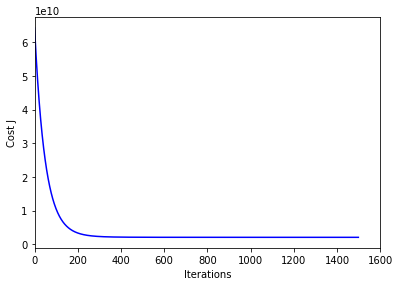

In [18]:
# Comenzamos con theta a ceros
theta = np.zeros(shape=[3,1])
# Obtener theta y el array de costes (Cost_J) mediante el descenso por gradiente
theta, J_history = gradientDescent(X, y, theta)
print('theta: ',theta.ravel())

# Muestra la gráfica con la evolución del coste J obtenido de la salida de gradientDescent
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.plot([i for i in np.arange(1500)], J_history, 'b')

axes.set_xlabel('Iterations')
axes.set_ylabel('Cost J')

axes.set_xlim([0, 1600])

In [19]:
# map(lambda ind: round(ind, 5), list(theta.ravel()))
Test.assertEquals(list(np.round(theta, 5)), [340412.56301,  109370.05670,   -6500.61510], 'Valores de theta incorrectos')

1 test passed.


### Regresión lineal con múltiples variables con scikit-learn

Realizar el aprendizaje utilizando el paquete de regresión lineal contenido en la librería scikit-learn de Python siguiendo el ejemplo de la práctica 2.

In [31]:
#se importa de la libreria scikit-learn de python (sklearn) el paquete correspondiente a la regresión lineal
from sklearn.linear_model import LinearRegression

# Se incializa el modelo llamando al constructor de la regresión lineal: todos los parámetros se asignan a sus valores por defecto
regr = LinearRegression()

# Se entrena el modelo (aprendizaje) utilizando la variable de entrada sin los unos X[:,1:] y la variable de salida (y)
print(X[:, 1:].shape, y.ravel().shape)
regr.fit(X[:, 1:], y.ravel())

(47, 2) (47,)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Predecir el valor de una casa de 100.3 metros cuadrados y 4 habitaciones. Como es un nuevo dato (test) se debe **estandarizar** con la función de estandarización de nuevos datos y utilizando la media y la desviación estándar de los datos de entrenamiento calculados previamente.

Predecir el valor de la casa utilizando el modelo aprendido con scikit-learn (función predict). Realiza la misma tarea para las thetas que hemos obtenido mediante nuestra implementación (en este segundo caso debes añadir el 1 en la primera columna). ¿Son iguales?

In [ ]:
# Obtén la predicción para una casa de 100.3 metros cuadrados y 4 habitaciones
datos = np.array([100.3, 4])
datos = estandarizarTest(datos, media, desv)

# Utiliza la función predict para obtener el valor predicho por la regresión de scikit-learn (guardar en variable valorCasa)
valorCasa = regr.predict(datos.reshape(-1, 2))
print('Valor casa: ', valorCasa)

# Utiliza la variable theta para obtener el valor predicho por la regresión obtenida por el descenso por gradiente
# Recuerda añadir la columna de 1s (guardar en variable valorCasa2)
datos =  np.array([1, datos[0], datos[1]])
ones = np.ones(len(datos))
datos = datos.reshape(1, -1)
valorCasa2 = datos.dot(theta)
print('Valor casa 2: ', valorCasa2)

In [ ]:
Test.assertEquals(np.round(valorCasa, 4), 68608.6637, 'Valor de la predicción de scikit-learn incorrecto')
Test.assertEquals(np.round(valorCasa2, 4), 68882.1621, 'Valor de la predicción de nuestra implementación incorrecto')

### Visualización
Para terminar, como estamos trabajando con dos variables de entrada, vamos a tratar de visualizar el plano que ha estimado la regresión lineal para este problema.

Para ello seguiremos unos pasos similares a los utilizados en la práctica 2 para pintar la superficie.
1. Obtenemos los valores que queremos evaluar para cada variable.
2. Creamos un grid de valores con todos ellos.
3. A partir de los valores del grid crearemos una matriz de datos que será la que debemos estandarizar antes de utilizar el modelo para predecir la salida.
4. Utilizaremos la visualización en 3D: scatter para mostrar los puntos y plot_surface para mostrar el plano.

En definitiva, debes replicar esta figura (a la izquierda el plano obtenido con scikit-learn y a la derecha el plano obtenido por nuestro descenso por gradiente):
![Ejemplo](img4.png "Ejemplo")


In [ ]:
# Crea 10 puntos para la primera dimensión (B0) entre 500 y 5000 (rango de la variable pies cuadrados)
B0 = np.linspace(500, 5000, 10)
# Crea 7 puntos para la segunda dimensión (B1) entre 0 y 6 (rango de la variable número de habitaciones)
B1 = np.linspace(0, 6, 7)

# Crear todas las combinaciones de los puntos creados anteriormente usando meshgrid (guardar en xx, yy)
xx, yy = np.meshgrid(B0, B1, indexing='xy')

# Crea una matriz Xtest que contenga todos los valores de xx en la primera columna y los de yy en la segunda
# Utiliza la función hstack y para para ello previamente tendras que darles la forma correspondiente a xx e yy (reshape)
xx2 = xx.reshape(-1, 1)
yy2 = yy.reshape(-1, 1)
Xtest = np.hstack((xx2, yy2))

# Normaliza la matriz obtenida usando la función estandarizarTest, ten en cuenta que puede trabajar con matrices directamente
Xtest = estandarizarTest(Xtest, media, desv)

# Utiliza predict para obtener los valores de Z (el plano) - luego hacemos un reshape (al shape de xx) para poder pintarlo
Z = regr.predict(Xtest)
Z = Z.reshape(7, -1)


# Utiliza los valores de theta para obtener la salida del modelo aprendido mediante el descenso por gradiente
# Recuerda en este caso añadir la columna de 1s. Almacena el resultado en Z2 y luego haz el reshape correspondiente
ones = np.full((Xtest.shape[0], 1), 1)
Z2 = np.hstack((ones, Xtest))
Z2 = Z2.dot(theta).reshape(7, -1)

# Pintamos las dos gráficas
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

# Utiliza scatter para pintar los puntos y luego plot_surface para pintar el plano de scikit-learn
ax1.scatter(data[:, 0], data[:, 1], data[:, 2], c='b')
ax1.set_title('Plano obtenido por scikit-learn')
ax1.plot_surface(xx, yy, Z, alpha=0.25)

# Utiliza scatter para pintar los puntos y luego plot_surface para pintar el plano de nuestro descenso por gradiente
ax2.scatter(data[:, 0], data[:, 1], data[:, 2], c='b')
ax2.set_title('Plano obtenido por el descenso por gradiente')
ax2.plot_surface(xx, yy, Z2, alpha=0.25, color='r')

# Pon a las dos figuras las etiquetas de cada dimensión (set_xlabel...)
for ax in fig.axes:
    ax.set_xlim(0, 6000)
    ax.set_ylim(-1, 7)
    ax.set_zlim(0, 900000)
    ax.set_xlabel('Pies cuadrados')
    ax.set_ylabel('Num. habitaciones')
    ax.set_zlabel('Precio en $')


### Tarea extra

Ahora vamos a afrontar el mismo problema de predecir el valor de bloques de casas pero teniendo en cuenta más información. Se trata de leer los datos que se encuentran en el fichero "boston.txt", donde la información de las 12 primeras columnas corresponde a 12 variables para realizar la regresión y al última columna es el precio de cada bloque de viviendas (expresado en miles de dólares). 
Concretamente, las 12 variables son:
        - CRIM     ratio de crímenes per capita
        - ZN       proporción de área residencial para viviendas de más de 25000 pies cuadrados
        - INDUS    proporción de áreas de negocios de venta no minorista por municipio
        - CHAS     variable categórica del río Charles (= 1 si vivienda limita con el río; 0 en otro caso)
        - NOX      concentración de óxidos nítricos (partes por cada 10 millones)
        - RM       número de habitaciones
        - AGE      proporción de casas habitadas que fueron construidas antes del 1940
        - DIS      distancia ponderada a 5 centros de empleo de Boston
        - RAD      índice de accesibilidad a las variantes de Boston
        - TAX      impuesto catastral por cada 10000 dólares
        - PTRATIO  ratio de estudiantes/profesor por municipio
        - LSTAT    porcentaje de población con poco nivel adquisitivo
       
Con esta información, se trata de entrenar un modelo de regresión lineal con 12 variables y responder a las siguientes preguntas:
1. ¿Cuál es el error si se realiza el aprendizaje sin normalización? ¿y con normalización? ¿Ocurre lo mismo con scikit que con nuestra implementación? ¿Qué se te ocurre para hacer que funcione sin aplicar la normalización?
2. ¿Cuál es la variable más relevante para realizar la regresión? ¿por qué?

Intenta conseguir el mejor ajuste posible cambiando el modelo (por ejemplo, considerando la regresión polinomial).


In [ ]:
data = np.loadtxt('boston.txt', delimiter=',')

In [ ]:
ones = np.ones(len(data)).reshape(-1, 1)
x1 = data[:, :data.shape[1]-1]
X = np.hstack((ones, x1))
y = data[:, -1].reshape(-1, 1)

entrada, media, desv = estandarizar(x1)

# Crea la matriz X concatenando una columna de unos con la matriz entrada (hstack)
X = np.hstack((ones, entrada))

In [ ]:
theta = np.zeros(shape=[data.shape[1],1])
# Obtener theta y el array de costes (Cost_J) mediante el descenso por gradiente
theta, J_history = gradientDescent(X, y, theta)

# Muestra la gráfica con la evolución del coste J obtenido de la salida de gradientDescent
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.plot([i for i in np.arange(1500)], J_history, 'b')

axes.set_xlabel('Iterations')
axes.set_ylabel('Cost J')

axes.set_xlim([0, 1600])

## Respuesta a las preguntas
### El error se muestra con anomalías sin normalización, en cambio con normalización podemos comprobar que tenemos un error mínimo al final de las iteraciones. En scikit sale muy parecido a nuestro gradiente
### La variable más importante sería el número de habitaciones